In [149]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [150]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [153]:
df.shape

(891, 12)

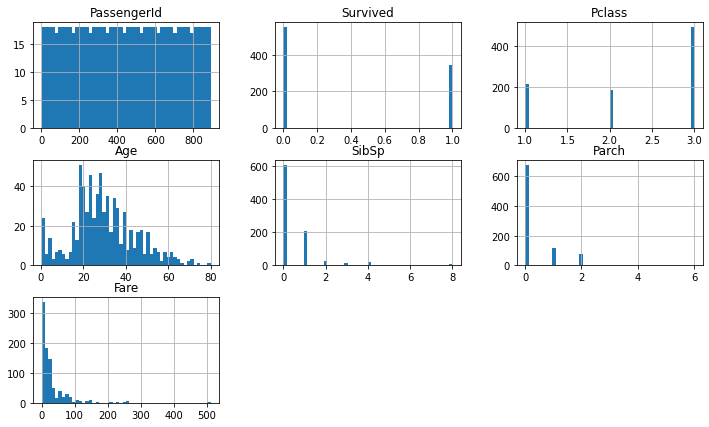

In [154]:
df.hist(bins=50,figsize=(12,7));

In [155]:
sex_count=df['Sex'].value_counts()
sex_count

male      577
female    314
Name: Sex, dtype: int64

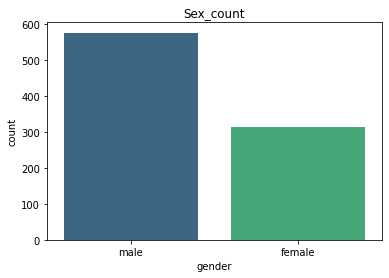

In [156]:
sns.barplot(x=sex_count.index,y=sex_count.values,palette='viridis')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Sex_count');

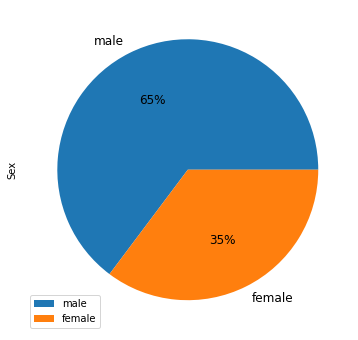

In [157]:
plt.figure(figsize=(12,6))

sex_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=sex_count.index)

In [27]:
pclass_count=df['Pclass'].value_counts()
pclass_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

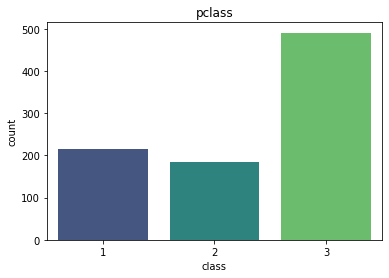

In [26]:
sns.barplot(x=pclass_count.index,y=pclass_count.values,palette='viridis')
plt.xlabel('class')
plt.ylabel('count')
plt.title('pclass');

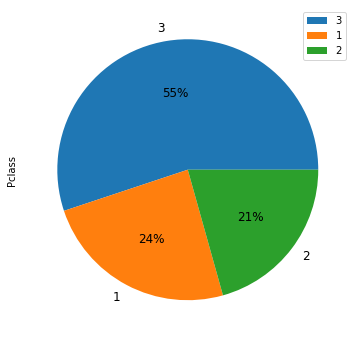

In [60]:
plt.figure(figsize=(12,6))

pclass_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=pclass_count.index)

In [41]:
Age_count=df['Age'].value_counts().head()
Age_count

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

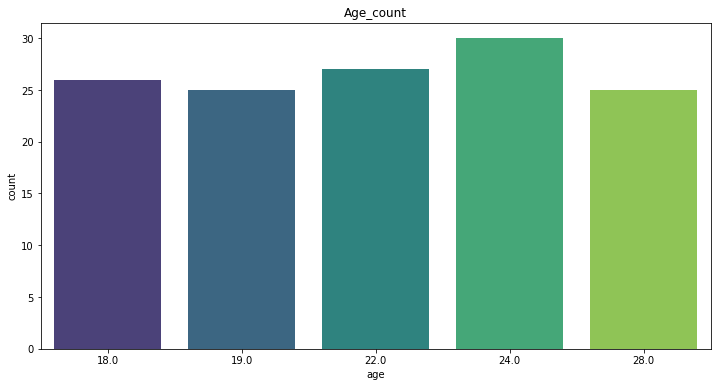

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x=Age_count.index,y=Age_count.values,palette='viridis')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Age_count');

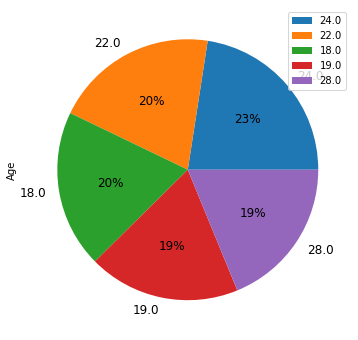

In [61]:
plt.figure(figsize=(12,6))

Age_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=Age_count.index)

In [64]:
sibsp_count=df['SibSp'].value_counts()
sibsp_count

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

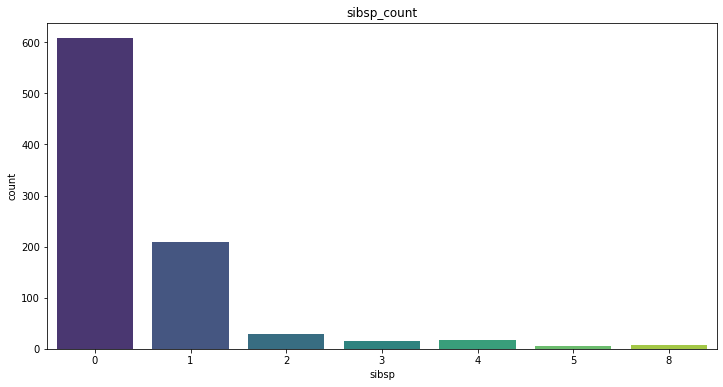

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(x=sibsp_count.index,y=sibsp_count.values,palette='viridis')

plt.xlabel('sibsp')
plt.ylabel('count')
plt.title('sibsp_count');

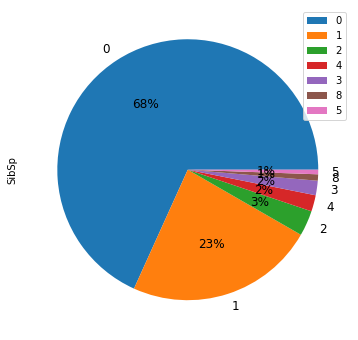

In [68]:
plt.figure(figsize=(20,6))

sibsp_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=sibsp_count.index)

In [69]:
parch_count=df['Parch'].value_counts()
parch_count

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

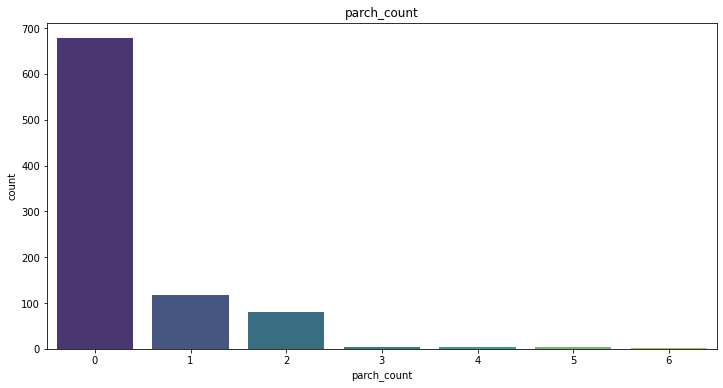

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x=parch_count.index,y=parch_count.values,palette='viridis')

plt.xlabel('parch_count')
plt.ylabel('count')
plt.title('parch_count');

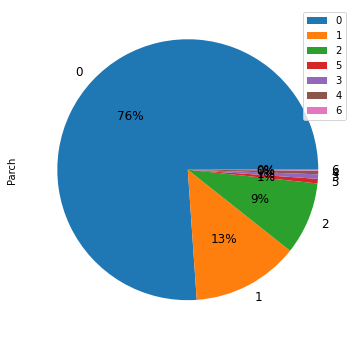

In [76]:
plt.figure(figsize=(13,6))

parch_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=parch_count.index)

In [77]:
Embarked_count=df['Embarked'].value_counts()
Embarked_count

S    644
C    168
Q     77
Name: Embarked, dtype: int64

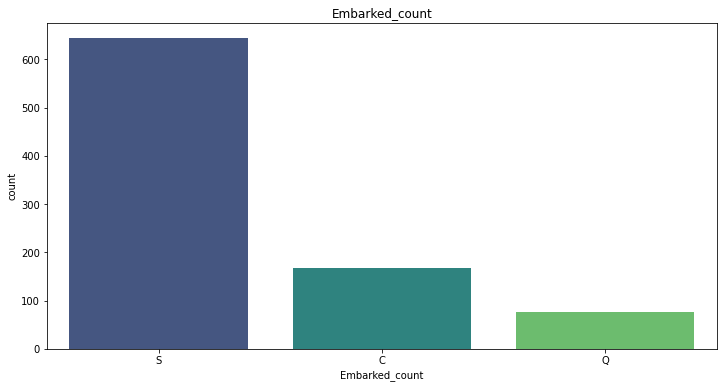

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x=Embarked_count.index,y=Embarked_count.values,palette='viridis')

plt.xlabel('Embarked_count')
plt.ylabel('count')
plt.title('Embarked_count');

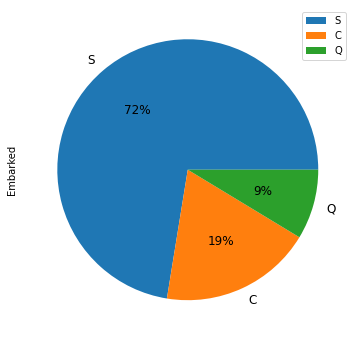

In [79]:
plt.figure(figsize=(13,6))

Embarked_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=Embarked_count.index)

In [85]:
survived_count=df['Survived'].value_counts()
survived_count

0    549
1    342
Name: Survived, dtype: int64

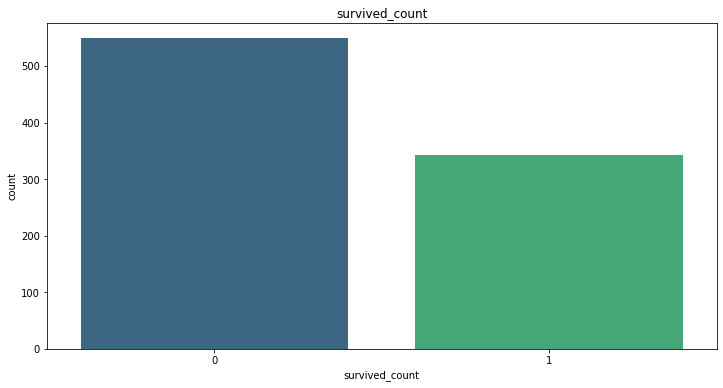

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x=survived_count.index,y=survived_count.values,palette='viridis')

plt.xlabel('survived_count')
plt.ylabel('count')
plt.title('survived_count');

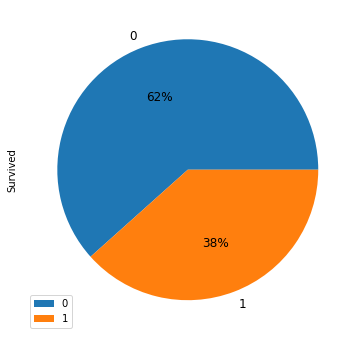

In [87]:
plt.figure(figsize=(13,6))

survived_count.plot(kind='pie',fontsize=12,autopct='%1.f%%')
plt.legend(labels=survived_count.index)

In [88]:
data=df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [92]:
data['Sex']=data['Sex'].replace({'male':1,'female':0})

In [94]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [95]:
data['Embarked']=data['Embarked'].replace({'S':0,'C':1,'Q':2})

In [97]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [98]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [103]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [104]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [106]:
data['Embarked'].fillna(data['Embarked'].median(),inplace=True)

In [107]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [108]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [110]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot: >

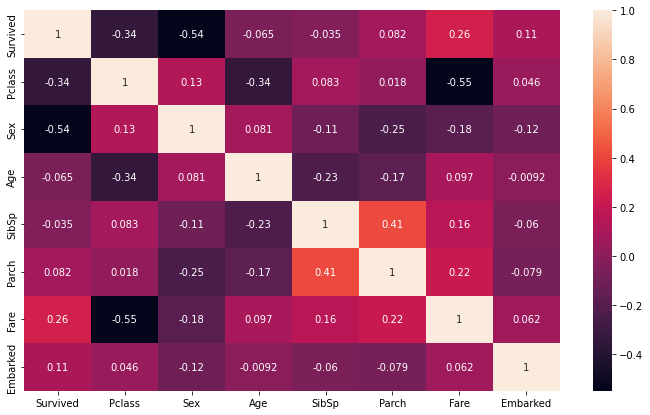

In [111]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

In [128]:
x=data.drop(columns=['Survived']).values
y=data['Survived'].values

In [129]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [135]:
model=LogisticRegression()

In [136]:
model.fit(x_train,y_train)

LogisticRegression()

In [138]:
model.score(x_train,y_train)

0.8019662921348315

In [140]:
y_p=model.predict(x_test)

In [142]:
print(accuracy_score(y_test,y_p))

0.7988826815642458


In [144]:
cn=confusion_matrix(y_test,y_p)
cn

array([[90, 15],
       [21, 53]], dtype=int64)

<AxesSubplot: >

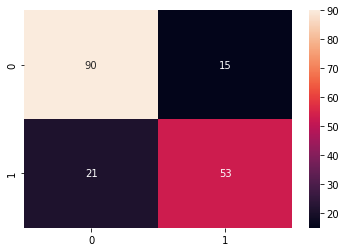

In [146]:
sns.heatmap(cn,annot=True)

In [147]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [148]:
#########################DECISIONTREE

In [170]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [171]:
DT.score(x_train,y_train)

0.9789325842696629

In [172]:
y_p=DT.predict(x_test)

In [173]:
print(accuracy_score(y_test,y_p))

0.7821229050279329


In [174]:
from sklearn.metrics import ConfusionMatrixDisplay

In [175]:
cn1=confusion_matrix(y_test,y_p)

In [176]:
cn1

array([[86, 19],
       [20, 54]], dtype=int64)

<AxesSubplot: >

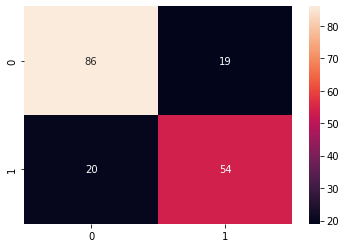

In [177]:
sns.heatmap(cn1,annot=True)

In [178]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [198]:
RF=RandomForestClassifier(n_estimators=1000)

In [199]:
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [200]:
RF.score(x_train,y_train)

0.9789325842696629

In [201]:
y_p2=RF.predict(x_test)

In [202]:
print(accuracy_score(y_test,y_p2))

0.8100558659217877


In [203]:
cn2=confusion_matrix(y_test,y_p2)
cn2

array([[89, 16],
       [18, 56]], dtype=int64)

<AxesSubplot: >

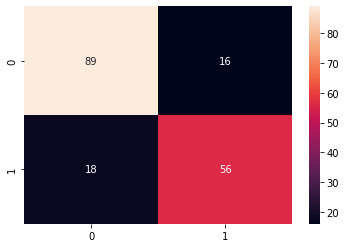

In [204]:
sns.heatmap(cn2,annot=True)

In [205]:
print(classification_report(y_test,y_p2))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
knn=KNeighborsClassifier(5)

In [208]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [209]:
knn.score(x_train,y_train)

0.8581460674157303

In [210]:
y_p3=RF.predict(x_test)

In [211]:
print(accuracy_score(y_test,y_p3))

0.8100558659217877


In [212]:
cn3=confusion_matrix(y_test,y_p3)
cn3

array([[89, 16],
       [18, 56]], dtype=int64)

<AxesSubplot: >

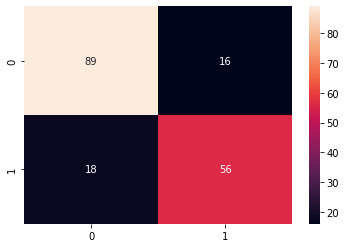

In [213]:
sns.heatmap(cn3,annot=True)

In [214]:
print(classification_report(y_test,y_p3))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

